In [162]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

#1

In [163]:
df = pd.read_csv('HR.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#2

In [164]:
print(df['satisfaction_level'].describe())
print(df['satisfaction_level'].median())
print(df['satisfaction_level'].mode()[0])

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64
0.64
0.1


In [165]:
print(df['last_evaluation'].describe())
print(df['last_evaluation'].median())
print(df['last_evaluation'].mode()[0])

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64
0.72
0.55


In [166]:
print(df['number_project'].describe())
print(df['number_project'].median())
print(df['number_project'].mode()[0])

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64
4.0
4


In [167]:
print(df['average_montly_hours'].describe())
print(df['average_montly_hours'].median())
print(df['average_montly_hours'].mode()[0])

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64
200.0
135


In [168]:
print(df['time_spend_company'].describe())
print(df['time_spend_company'].median())
print(df['time_spend_company'].mode()[0])

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64
3.0
3


#3

In [169]:
perm = df.loc[:,~df.columns.isin(['Work_accident','left','promotion_last_5years'])]
perm.corr(method='spearman')

<ipython-input-169-f1f8acd5438b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  perm.corr(method='spearman')


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


<ipython-input-170-992b4eadb312>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(perm.corr(method='spearman'), annot=True, cmap='crest')


<Axes: >

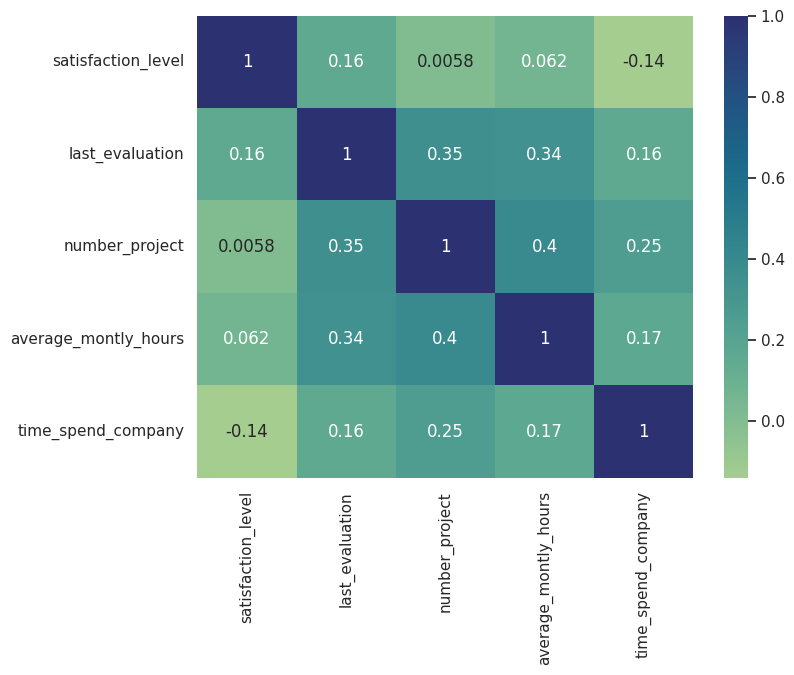

In [170]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(perm.corr(method='spearman'), annot=True, cmap='crest')

*   2 самые скоррелированные - average_monthly_hours и number_project
*   2 наименее скоррелированные - number_project и satisfaction_level

#4

In [171]:
df.groupby('department')['salary'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64

#5

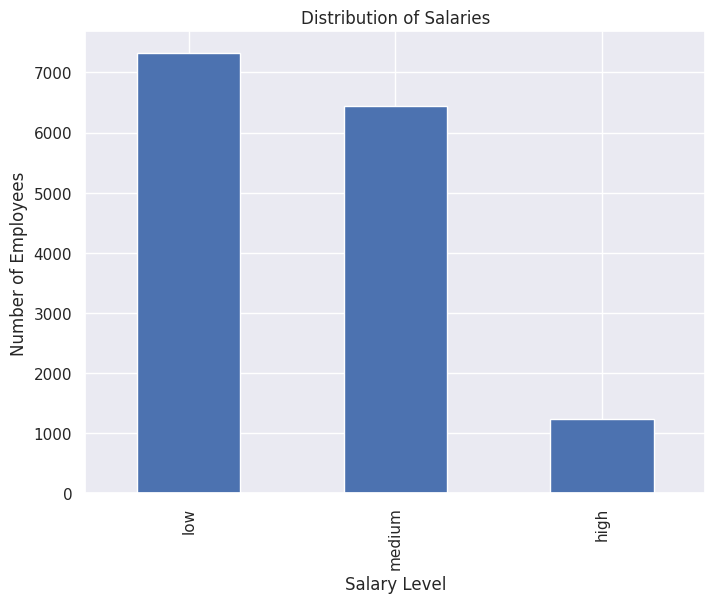

In [172]:
df['salary'].value_counts().plot(kind='bar', title='Distribution of Salaries')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.show()

#6

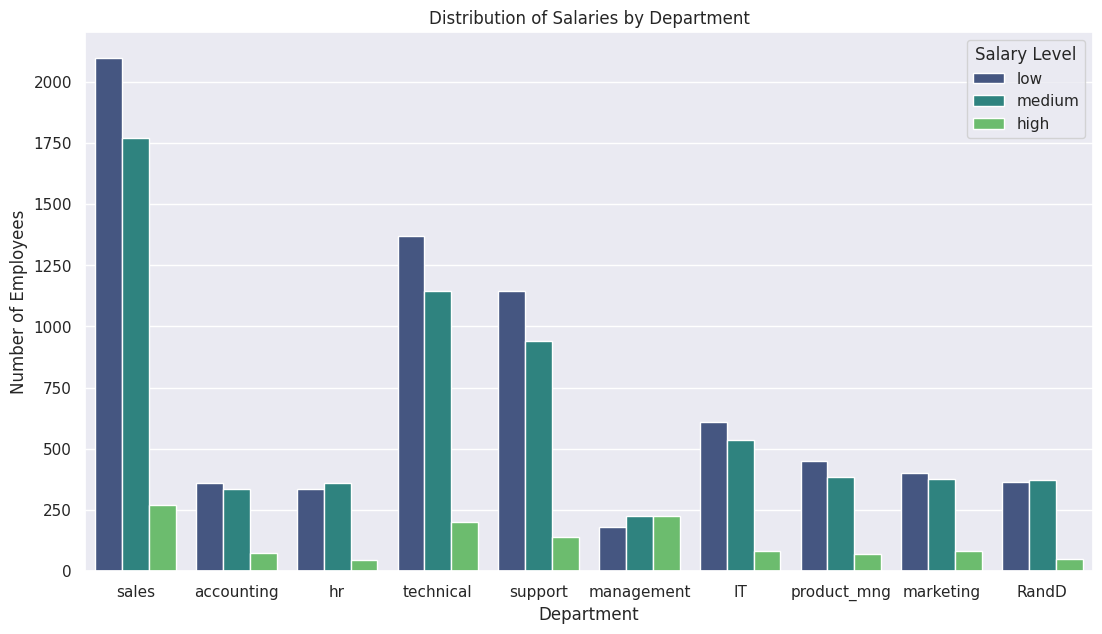

In [173]:
plt.figure(figsize=(13, 7))

sns.countplot(data=df, x='department', hue='salary', palette='viridis')
plt.title('Distribution of Salaries by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Salary Level')

plt.show()

#7

Статистика = 0.729, p = 0.466
Не отклоняем нулевую гипотезу, среднеевремя проведенное сотрудниками с разными уровнями зарплат, вероятно, не отличаются 


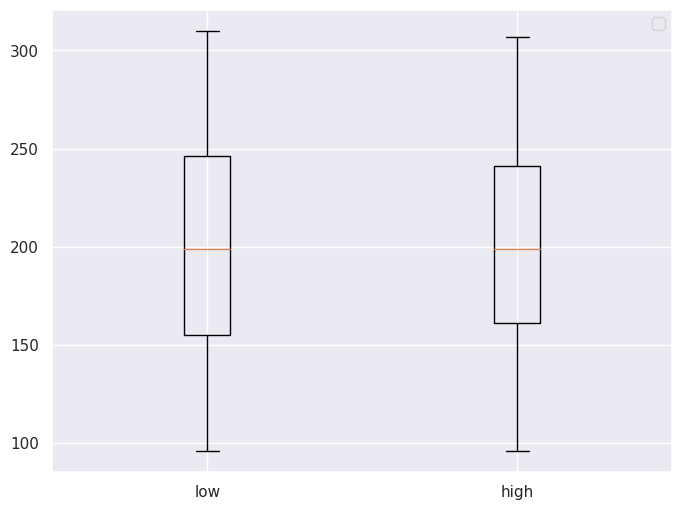

In [174]:
#H0: Среднеевремя проведенное сотрудниками с разными уровнями зарплат не отличается.
#H1: Среднеевремя проведенное сотрудниками с разными уровнями зарплат отличается.

df_low = df.loc[df['salary']=='low']
df_high = df.loc[df['salary']=='high']

stat, p = st.ttest_ind(df_low['average_montly_hours'],df_high['average_montly_hours'])

print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, среднеевремя проведенное сотрудниками с разными уровнями зарплат, вероятно, не отличаются ")
else:
    print("Отклоняем нулевую гипотезу, среднеевремя проведенное сотрудниками с разными уровнями зарплат, вероятно,отличаются")

plt.boxplot([df_low['average_montly_hours'],df_high['average_montly_hours']],labels = ['low','high'])
plt.legend()
plt.show()

Гмпотеза,  что сотрудники с высоким окладом проводят на работе больше времени,чем сотрудники с низким окладом не подтвердилась. Уровни заплат не отличаются.

#8

In [175]:
df_left = df.loc[df['left']==1]
df_notleft = df.loc[df['left']==0]

In [176]:
x1 = df_left['promotion_last_5years'].value_counts()
prop1 = x1[1]/x1.sum()

x2 = df_notleft['promotion_last_5years'].value_counts()
prop2 = x2[1]/x2.sum()

print(f"Доля сотрудников с повышением за последние 5 лет среди уволившихся {prop1:.2%}")
print(f"Доля сотрудников с повышением за последние 5 лет среди не уволившихся {prop2:.2%}")

Доля сотрудников с повышением за последние 5 лет среди уволившихся 0.53%
Доля сотрудников с повышением за последние 5 лет среди не уволившихся 2.63%


In [177]:
x1 = df_left['satisfaction_level'].mean()
x2 = df_notleft['satisfaction_level'].mean()

print(f"Средняя степень удовлетворенности среди уволившихся {x1:.2}")
print(f"Средняя степень удовлетворенности не уволившихся {x2:.2}")

Средняя степень удовлетворенности среди уволившихся 0.44
Средняя степень удовлетворенности не уволившихся 0.67


In [178]:
x1 = df_left['number_project'].mean()
x2 = df_notleft['number_project'].mean()

print(f"Среднее количество проектов среди уволившихся {x1:.2}")
print(f"Среднее количество проектов не уволившихся {x2:.2}")

Среднее количество проектов среди уволившихся 3.9
Среднее количество проектов не уволившихся 3.8


#9

In [179]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [180]:

X = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [181]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [182]:
y_pred = lda.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result)

       Actual  Predicted
6723        0          0
6473        0          0
4679        0          0
862         1          0
7286        0          0
...       ...        ...
13388       0          0
10463       0          1
5331        0          0
7499        0          0
11796       0          0

[4500 rows x 2 columns]


In [183]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}\n')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7558

Confusion Matrix:
[[3138  290]
 [ 809  263]]
